# Data Description:

**The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not
scaled). The data has 8 quantitative input variables, and 1 quantitative output
variable, and 1030 instances (observations).**

**Attribute Information:**
1. Cement : measured in kg in a m3 mixture
2. Blast : measured in kg in a m3 mixture
3. Fly ash : measured in kg in a m3 mixture
4. Water : measured in kg in a m3 mixture
5. Superplasticizer : measured in kg in a m3 mixture
6. Coarse Aggregate : measured in kg in a m3 mixture
7. Fine Aggregate : measured in kg in a m3 mixture
8. Age : day (1~365)
9. Concrete compressive strength measured in MPa

**Objective:**
Modeling of strength of high performance concrete using Machine Learning

# Steps and tasks:

**1. Deliverable -1 (Exploratory data quality report reflecting the following)(20 marks)**

    a. Univariate analysis (5 marks)
        i. Univariate analysis – data types and description of the 
        independent attributes which should include (name,
        meaning, range of values observed, central values (mean
        and median), standard deviation and quartiles, analysis of
        the body of distributions / tails, missing values, outliers
    b. Multivariate analysis (5 marks)
        i. Bi-variate analysis between the predictor variables and
        between the predictor variables and target column.
        Comment on your findings in terms of their relationship and
        degree of relation if any. Presence of leverage points.
        Visualize the analysis using boxplots and pair plots,
        histograms or density curves. Select the most appropriate
        attributes
    c. Pick one strategy to address the presence outliers and missingvalues and perform necessary imputation (10 marks)


**Import Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing the feature scaling library
from sklearn.preprocessing import StandardScaler
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
#importing kmeans clustering library
from sklearn.cluster import KMeans
#importing Support Vector Regressor SVR library
from sklearn.svm import SVR

# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore

#Import the metrics
from sklearn import metrics
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

## Read the Dataset and Do Basic Statistics Analysis

In [2]:
concrete_df=pd.read_csv('concrete.csv')

In [3]:
#Check the first five records 
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
#Info of the dataset
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
#To get the shape 
concrete_df.shape

(1030, 9)

In [6]:
# Data type of the columns 
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [7]:
#To get the columns name
concrete_df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

**Observation**

1. There are 1030 Records and 9 columns.
2. All the records are numeric, except age which is integer type all other columns are float type.
3. Dependent variable is strength attributes, as explained in problem statement
4. Other independent variables are cement, slag, ash, water, superplastic, coarsea.gg, fineagg, age.
2. All the records are numeric.

In [8]:
# Five point summary
pd.set_option('precision', 2)
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.17,104.51,102.00,192.38,272.90,350.00,540.0
slag,1030.0,73.90,86.28,0.00,0.00,22.00,142.95,359.4
ash,1030.0,54.19,64.00,0.00,0.00,0.00,118.30,200.1
water,1030.0,181.57,21.35,121.80,164.90,185.00,192.00,247.0
superplastic,1030.0,6.20,5.97,0.00,0.00,6.40,10.20,32.2
coarseagg,1030.0,972.92,77.75,801.00,932.00,968.00,1029.40,1145.0
fineagg,1030.0,773.58,80.18,594.00,730.95,779.50,824.00,992.6
age,1030.0,45.66,63.17,1.00,7.00,28.00,56.00,365.0
strength,1030.0,35.82,16.71,2.33,23.71,34.45,46.14,82.6


1. It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) and count of the columns of the dataset.
2. We can see that cement,slag,ash are left skewed

# Exploratory Data Analysis

## Deliverable -1 A. Univariate analysis
data types and description of the independent attributes which should include (name,    meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers

In [9]:
#Measuring the skewneww of the data to understand its distribution
concrete_df.skew(numeric_only  = True)

cement          0.51
slag            0.80
ash             0.54
water           0.07
superplastic    0.91
coarseagg      -0.04
fineagg        -0.25
age             3.27
strength        0.42
dtype: float64

#### Let's visualize the distribution of the data

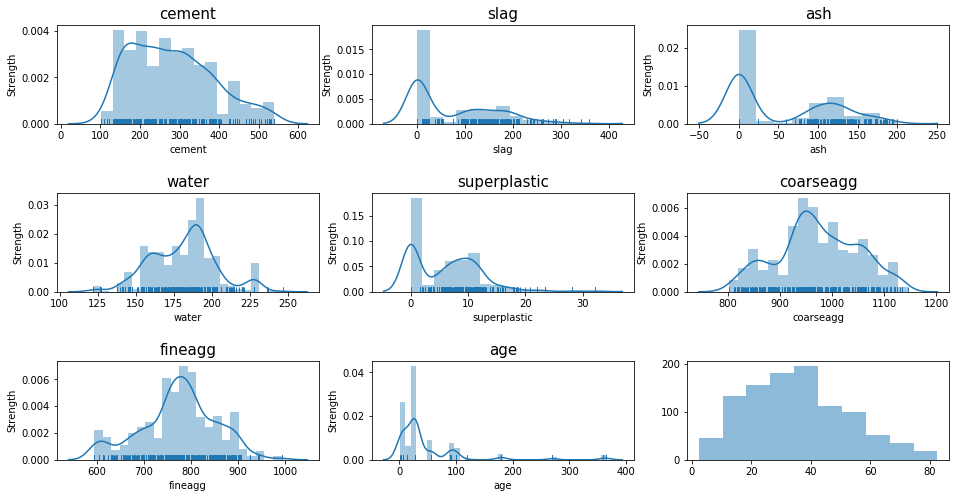

In [10]:
pos = 1    # a variable to manage the position of the subplot in the overall plot
plt.figure(figsize= (16,8))
for feature in concrete_df.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    plt.subplot(3, 3, pos)   # plot grid

    plt.subplots_adjust(hspace=0.7, wspace=0.2)
#    sns.set(font_scale=1)  
    if feature!='strength':   # Plot distribution for all the columns except name and status
        d=sns.distplot(concrete_df[feature], kde= True, rug=True)
        d.axes.set_title(feature,fontsize=15)
        d.set_xlabel(feature,fontsize=10)
        d.set_ylabel("Strength",fontsize=10)
    else:
        plt.hist(concrete_df['strength'].values,10, alpha=0.5);# Plot count graph for the column name
    pos += 1  # to plot over the grid one by one

**Observation**

We can see observe that :

1. water,coarseagg, fineagg has three guassians and is almost normal.
2. cement,slag, ash, superplastic are close to Normal, with slight right skewed.
3. age is rightly skewed, with more than 3 gausian.

### Description of the independent attributes which include - name,meaning, range of values observed, central values (mean and median), standard deviation and quartiles

In [11]:
#Lets Define One Function to Calculate all the required values in One Go for All the attributes
def detailed_info(data):
    for i in data:
        print('Attribute Name: ', i)
        stat=data[i].describe()
        print('Range of values: ', stat.loc['max']-stat.loc['min'])
        print('Central values:') 
        print('Minimum age: ', stat.loc['min'])
        print('Maximum age: ',stat.loc['max'])
        print('Mean value: ', stat.loc['mean'])
        print('Median value: ',stat.loc['50%'])
        print('Standard deviation: ', stat.loc['std'])
        #Quartiles
        Q1=data[i].quantile(q=0.25)
        Q3=data[i].quantile(q=0.75)
        IQR=stats.iqr(data[i])
        print('1st Quartile (Q1) is: ', Q1)
        print('3st Quartile (Q3) is: ', Q3)
        print('Interquartile range (IQR) is ', IQR)
        
        #Outliers data
        outlier_data=[]
        #print('outlier_data Empty:',i,outlier_data)
        for j in data[i]:
            #print('Second iteration j val:',j)
            #print('Second iteration j:',j)
            if(j < (Q1 - 1.5 * IQR)):
                #print('out lier values',i,j,Q1,Q3,IQR)
                outlier_data.append(j)
                
            if(j > (Q3 + 1.5 * IQR)):
                #print('out lier values',i,j,Q1,Q3,IQR)
                outlier_data.append(j)

        print('Total Outliers data for',i,':',len(outlier_data))
        print('Values in Outliers data for',i,':',outlier_data)
        #print(outlier_data)
   
        print('\n')
        
    return 
detailed_info(concrete_df)

Attribute Name:  cement
Range of values:  438.0
Central values:
Minimum age:  102.0
Maximum age:  540.0
Mean value:  281.1678640776698
Median value:  272.9
Standard deviation:  104.50636449481536
1st Quartile (Q1) is:  192.375
3st Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625
Total Outliers data for cement : 0
Values in Outliers data for cement : []


Attribute Name:  slag
Range of values:  359.4
Central values:
Minimum age:  0.0
Maximum age:  359.4
Mean value:  73.89582524271844
Median value:  22.0
Standard deviation:  86.2793417481054
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  142.95
Interquartile range (IQR) is  142.95
Total Outliers data for slag : 2
Values in Outliers data for slag : [359.4, 359.4]


Attribute Name:  ash
Range of values:  200.1
Central values:
Minimum age:  0.0
Maximum age:  200.1
Mean value:  54.188349514563086
Median value:  0.0
Standard deviation:  63.99700415268794
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  118.3
Interquartile ra

### The same can be visualize with boxplot

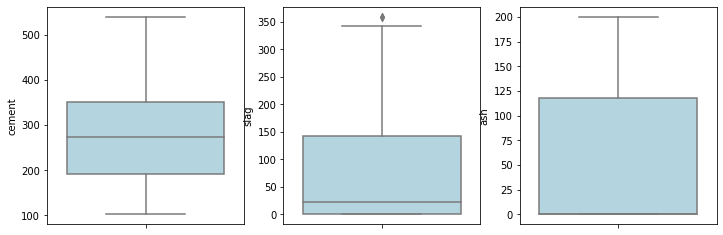

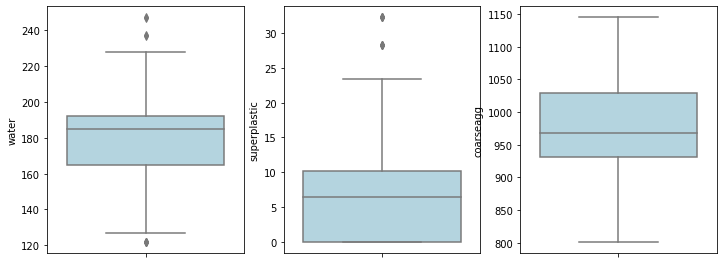

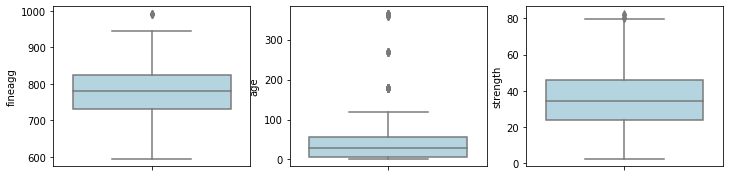

<Figure size 864x720 with 0 Axes>

In [12]:
#plot with boxplot

totalplot=len(concrete_df.columns)

def plot_outliers_data(data):
    count=1
    partSubPlot=int(totalplot/3)
    rowCount=1
    plt.figure(figsize= (12,4))
    for i in data:
#        print(count,partSubPlot)
        plt.subplot(rowCount,partSubPlot,count)
        sns.boxplot(data[i], orient='vertical',color='lightblue')
        count+=1
        if(count>3):
            plt.show()
            plt.figure(figsize= (12,10))
            rowCount=rowCount+1
#            partSubPlot=partSubPlot+1
            count=1
#            print('Inside if',rowCount,count,partSubPlot)
    return
plot_outliers_data(concrete_df)

#### Observation: The below Attributes are having outliers
1. Age, The Maximum Number of Outliers exists here
2. superplastic, slag, water has lesser no of outliers

## Deliverable -1 B. MultiVariate Analysis

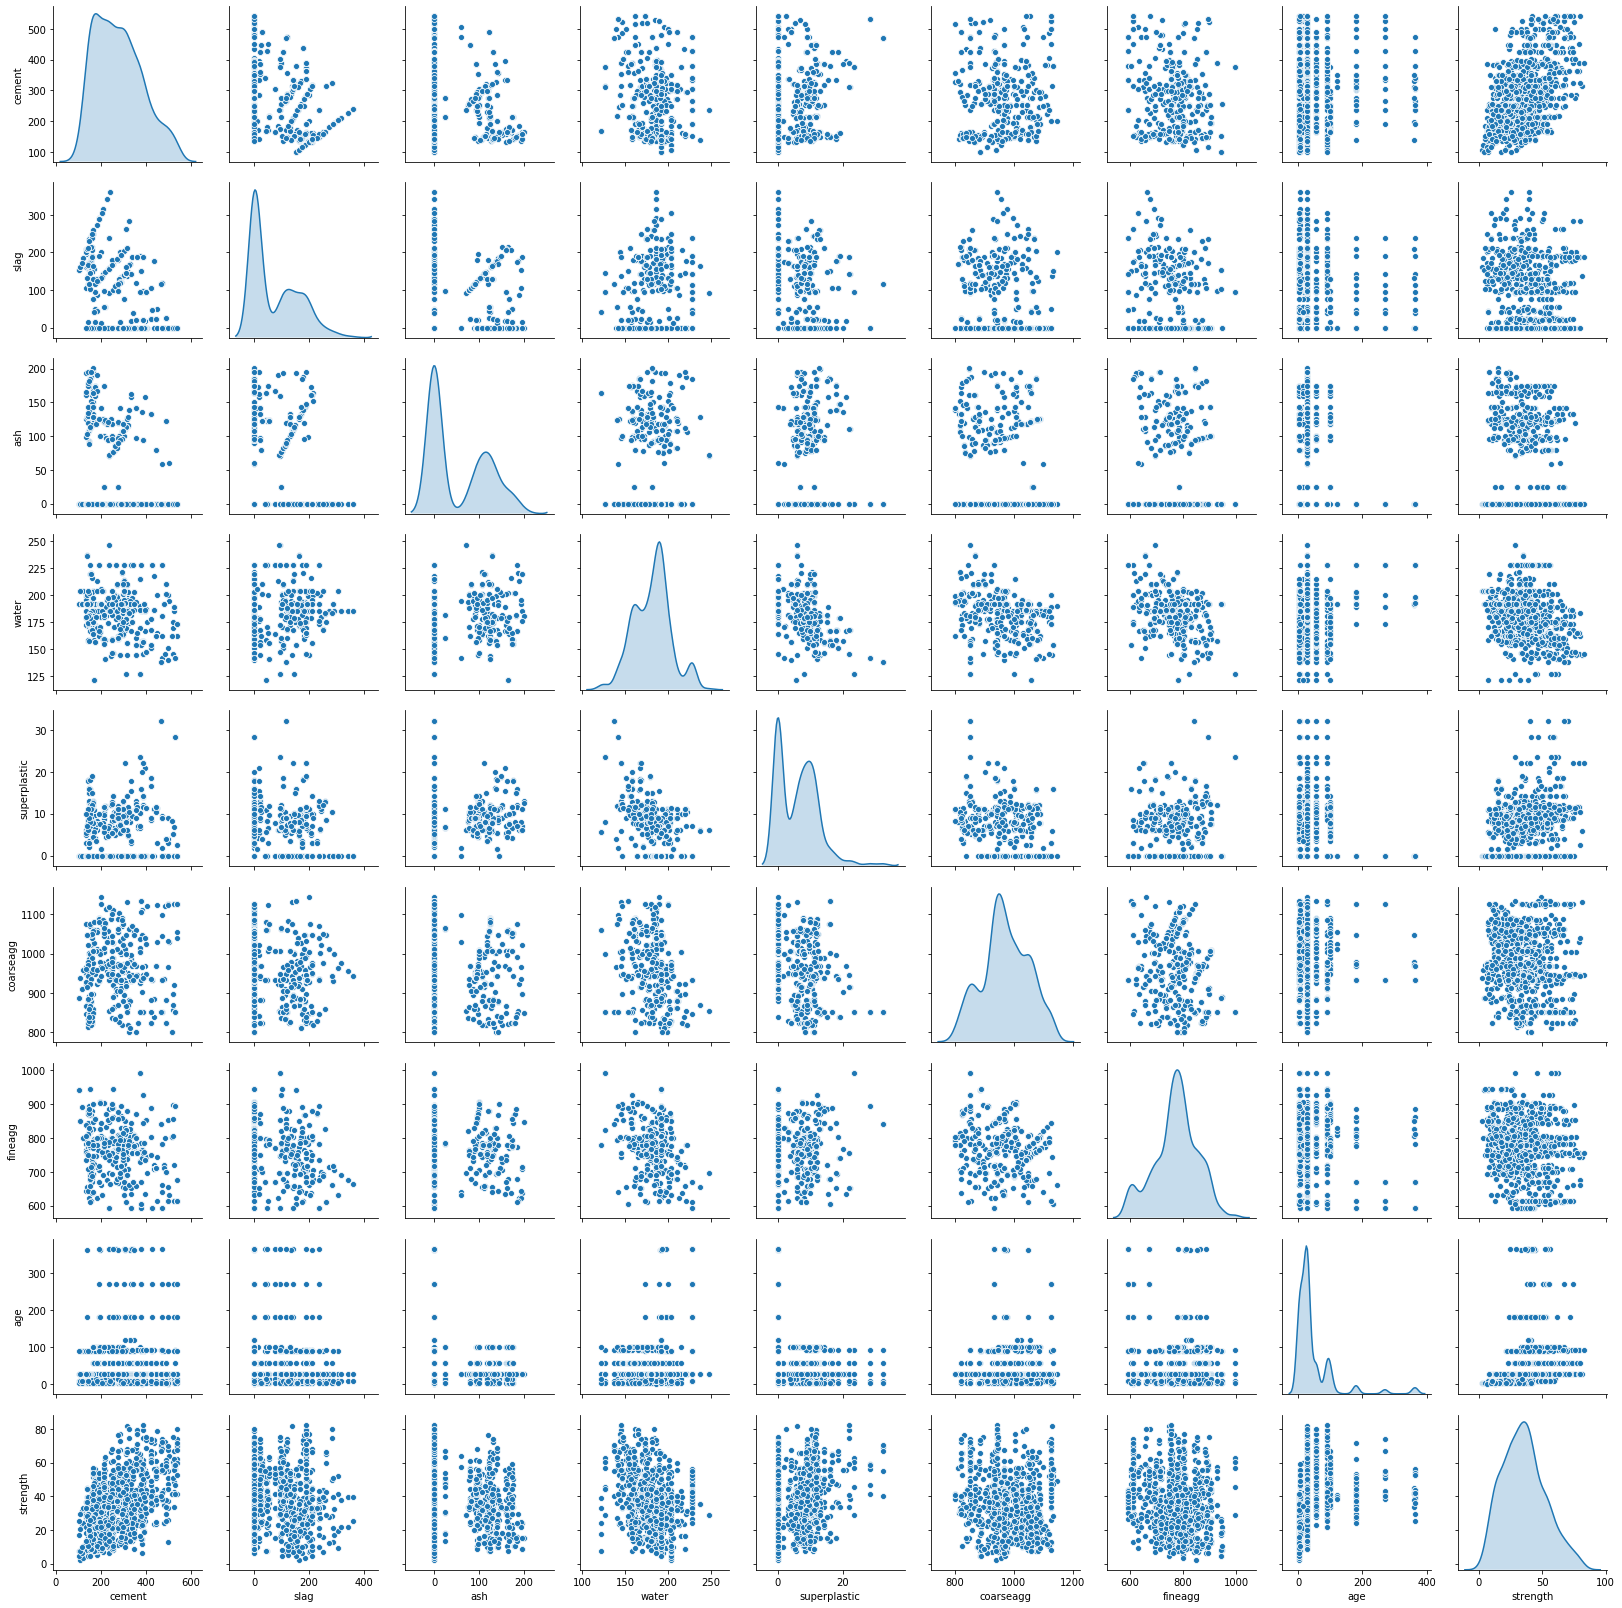

In [13]:
## pairplot- plot density curve instead of histogram in diagonal
sns.pairplot(concrete_df, diag_kind='kde')

**Observation**

Almost normal distribution for the below attributes:
1. cement.
2. coarseagg.
3. fineagg.
4. strength.

Skeweness, gausians and presence of outlies:
1. slag has two gausssians and rightly skewed.It shows the presence of outlies.
2. ash has two gaussians and rightly skewed.It shows the presence of outlies.
3. water has atleast 3 guassians and slighly left skewed.It shows the presence of outlies.
4. superplastic has 2 gaussians and rightly skewed.It shows the presence of outlies.
5. age has multiple guassians and rightly skewed. It shows the presence of outlies.

Co-rellation:
1. High co-relation between cement and strength.
2. strength attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age.

Overall: 
    This data sets looks like has 3 or more Gausians(max could be 3*5=15, 5 for age), we need to find it out, we can start with 3

In [14]:
# corrlation matrix 
cor=concrete_df.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.00,-0.28,-3.97e-01,-0.08,0.09,-1.09e-01,-0.22,8.19e-02,0.50
slag,-0.28,1.00,-3.24e-01,0.11,0.04,-2.84e-01,-0.28,-4.42e-02,0.13
ash,-0.40,-0.32,1.00e+00,-0.26,0.38,-9.96e-03,0.08,-1.54e-01,-0.11
water,-0.08,0.11,-2.57e-01,1.00,-0.66,-1.82e-01,-0.45,2.78e-01,-0.29
superplastic,0.09,0.04,3.78e-01,-0.66,1.00,-2.66e-01,0.22,-1.93e-01,0.37
coarseagg,-0.11,-0.28,-9.96e-03,-0.18,-0.27,1.00e+00,-0.18,-3.02e-03,-0.16
fineagg,-0.22,-0.28,7.91e-02,-0.45,0.22,-1.78e-01,1.00,-1.56e-01,-0.17
age,0.08,-0.04,-1.54e-01,0.28,-0.19,-3.02e-03,-0.16,1.00e+00,0.33
strength,0.50,0.13,-1.06e-01,-0.29,0.37,-1.65e-01,-0.17,3.29e-01,1.00


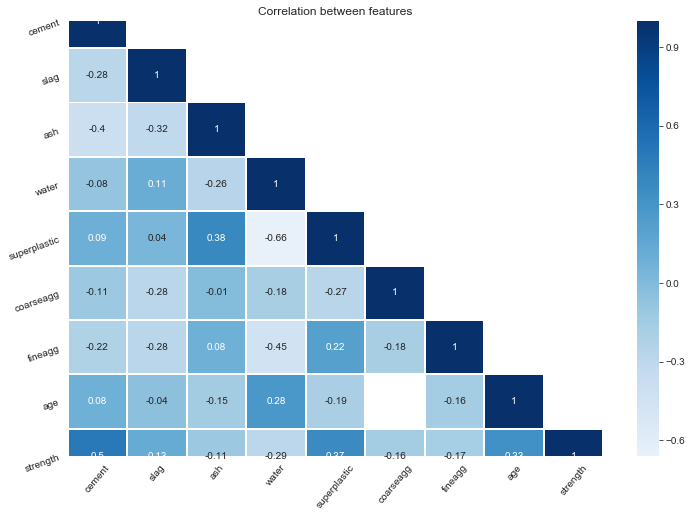

In [15]:
corr = round(cor,2) # correlation matrix
lower_triangle = np.tril(corr, k = 0)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (12,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.1, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.title('Correlation between features');
plt.show()

### Observation
Here, we can see the correlation value between water with other the attributes are mostly -ve except age and slag.

Strength of the cement is +ve co-related with cement, superplastic, age and slag, with cement being the highest and slag being the lowest.

Superplastic has +ve co-relation with lineagg, ash and strength.

## Deliverable -1 C. Handling missing values and Outliers

### Checking the presence of missing values

In [16]:
print('Total number of missing values:',concrete_df.isnull().sum().sum())
print('Total missing values for each attribute:')
print(concrete_df.isnull().sum())

Total number of missing values: 0
Total missing values for each attribute:
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


### Observation: No Missing Value present in the data set

In [17]:
#Handling the outliers
#Checking for outliers
concrete_outl_df=concrete_df.copy()

#Replacing the outliers by median
for col_name in concrete_outl_df.columns[:-1]:
    q1 = concrete_outl_df[col_name].quantile(0.25)
    q3 = concrete_outl_df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    concrete_outl_df.loc[(concrete_outl_df[col_name] < low) | (concrete_outl_df[col_name] > high), col_name] = concrete_outl_df[col_name].median()


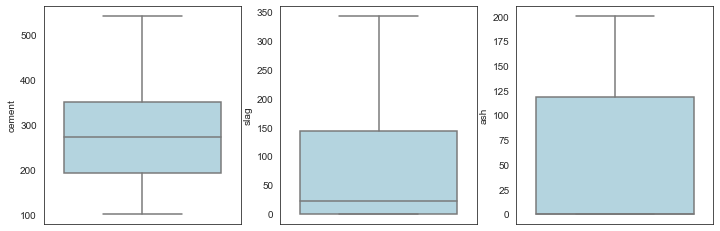

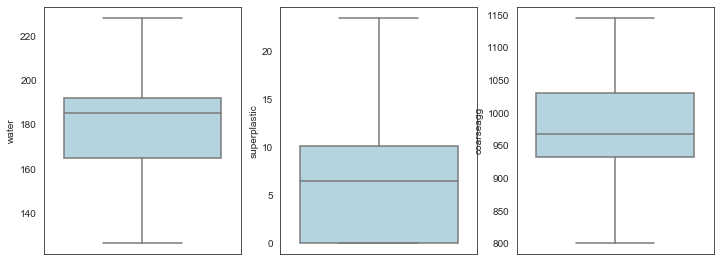

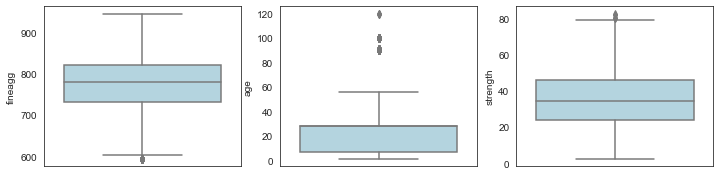

<Figure size 864x720 with 0 Axes>

In [18]:
plot_outliers_data(concrete_outl_df)

### Observation: The below Attributes are having outliers
#### 1. Except Age all outliers data has removed also outliers value for age has reduced drastically

## 2. Deliverable -2 (Feature Engineering techniques) (15 marks)

    a. Identify opportunities (if any) to create a composite feature, drop a feature etc. (5 marks)
    b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help (5 marks)
    c. Explore for gaussians. If data is likely to be a mix of gaussians,explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength (5 marks)

### Use of Support Vector Regressor, Polynomial Regession and K-Means Clustering for Complexity of the Model


## Z-score for scaling

Here, all the attributes in the same scale(unit) except the age attribute. Hence, we are scaling the attributes. We are using zscore for scaling.


In [19]:
#Scaling the features
concrete_df_z = concrete_outl_df.apply(zscore)
concrete_df_z.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.34,1.63,-0.85,1.06,-1.09,-0.01,-0.31,-0.15,-0.36
1,-1.07,-0.36,1.10,-1.13,0.88,1.39,0.30,-0.66,-0.74
2,-0.30,-0.86,0.65,0.28,-0.09,-0.21,1.13,-0.15,-0.40
3,-0.15,0.48,-0.85,2.25,-1.09,-0.53,-1.30,-0.15,0.60
4,-1.21,1.29,-0.85,0.57,0.57,0.96,-0.96,-0.15,-1.05


### Support Vector Regressor

#### Splitting the data into independent(Cement) and dependent(Strength) attributes 

In [20]:
X=concrete_outl_df.iloc[:,0:1].values
y = concrete_outl_df.iloc[:,8].values
y=np.reshape(y,(len(y),1))
y.shape

(1030, 1)

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

### Split the dataset into training and test set in the ratio of 70:30 along with Scaling of the Data(Training:Test).

In [22]:
#Split the data in the ratio of 70:30
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size=0.30, random_state=10)

### Kernel- rbf: I choose rbf for these 2 feature combination as their co-relation is .51, which is very rare probability of being a linear function.

In [23]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

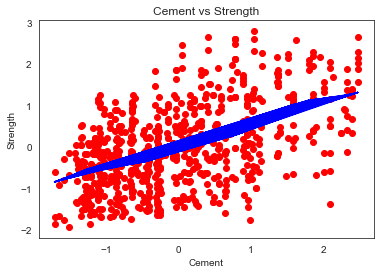

In [24]:
plt.scatter(X_train, y_train,color='red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Cement vs Strength')
plt.xlabel('Cement')
plt.ylabel('Strength')
plt.show()

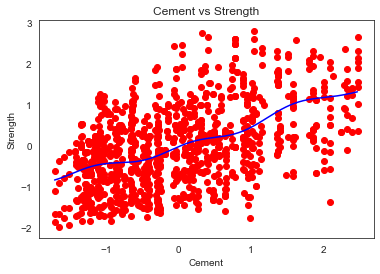

In [25]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, model.predict(X_grid), color = 'blue')
plt.title('Cement vs Strength')
plt.xlabel('Cement')
plt.ylabel('Strength')
plt.show()

In [26]:
# Predicting a new result
firstTestData=sc_X.inverse_transform(X_test[0])
print('Test Data Input:',firstTestData)
y_pred = model.predict(np.reshape(firstTestData,(1,1)))
predictedOut=sc_y.inverse_transform(y_pred)
print('Predicted Data Output:',predictedOut)

Test Data Input: [297.2]
Predicted Data Output: [40.31280562]


## Observation: 

Line is Not fitting et all, predicted value is very poor for the given data input, 

### We should try with Polynomial Feature of Regression

In [27]:
# Importing the dataset
X = concrete_outl_df.iloc[:, 0:1].values
y = concrete_outl_df.iloc[:, 8].values

y=np.reshape(y,(len(y),1))
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [28]:
#Split the data in the ratio of 70:30
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size=0.30, random_state=10)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

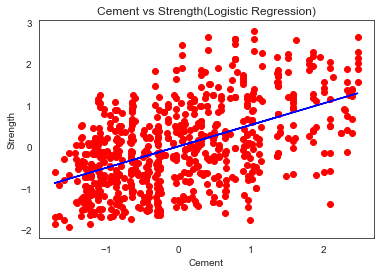

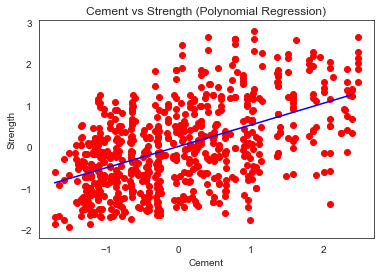

In [29]:
# Visualising the Linear Regression results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('Cement vs Strength(Logistic Regression)')
plt.xlabel('Cement')
plt.ylabel('Strength')
plt.show()

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)


# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X_train), max(X_train), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Cement vs Strength (Polynomial Regression)')
plt.xlabel('Cement')
plt.ylabel('Strength')
plt.show()

In [30]:
# Predicting a new result
firstTestData=sc_X.inverse_transform(X_test[0])
print('Test Data Input:',firstTestData)

y_pred = lin_reg.predict(np.reshape(firstTestData,(1,1)))
predictedOut=sc_y.inverse_transform(y_pred)
print('Predicted Data Output Linear Regression:',predictedOut)

# Predicting a new result with Polynomial Regression
y_pred = lin_reg_2.predict(poly_reg.fit_transform(np.reshape(firstTestData, (1,1))))
predictedOut=sc_y.inverse_transform(y_pred)
print('Predicted Data Output With Polynomial:',predictedOut)

Test Data Input: [297.2]
Predicted Data Output Linear Regression: [[2604.02139703]]
Predicted Data Output With Polynomial: [[5746.74475744]]


### Observation: 
Line is Not fitting et all, predicted value is much higher for the given data input, Even trying with Polynomial Feature of Linear Regression. **Rather SVR-with rbf kernel did better work with rbf.**

## K Means Clustering


In [31]:
concrete_df_z.shape

(1030, 9)

In [32]:
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(concrete_df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,9270.00
1,2,7561.66
2,3,6359.82
3,4,5576.15
4,5,5103.62
5,6,4646.27
6,7,4233.19
7,8,4003.06
8,9,3748.91
9,10,3557.85


In [33]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

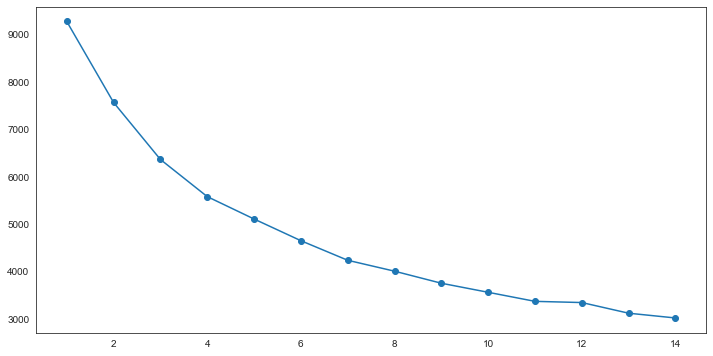

In [34]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [35]:
# k=5
cluster = KMeans( n_clusters = 5, random_state = 10 )
cluster.fit(concrete_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [36]:
concrete_df_z.shape

(1030, 9)

In [37]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(concrete_df_z)
concrete_df_z["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
concrete_df_z_copy = concrete_df_z.copy(deep = True)

In [38]:
kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(concrete_df_z[concrete_df_z.columns[1:5]])
concrete_df_z['GROUP'] = kmeans.fit_predict(concrete_df_z[concrete_df_z.columns[1:5]])
centers = kmeans.cluster_centers_
labels = kmeans.predict(concrete_df_z[concrete_df_z.columns[1:5]])
concrete_df_z.GROUP.unique()

array([3, 1, 4, 2, 0], dtype=int64)

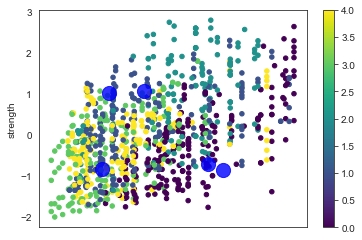

In [39]:
concrete_df_z.plot.scatter(x = 'cement', y = 'strength', c=labels, s=20, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.8)

In [40]:
centroids = cluster.cluster_centers_
centroids

array([[ 1.44241543, -0.43385411, -0.65765432,  1.28622801, -0.98879291,
         0.14087283, -1.64051974,  0.12996742,  0.68134662],
       [ 0.98507514,  0.48038901, -0.43125848, -0.99506659,  1.03039577,
        -0.6615536 ,  0.14461931,  0.05716724,  1.161212  ],
       [-0.85172072,  1.23666529, -0.36431937,  0.58851223, -0.45640506,
        -0.27272568, -0.30479276, -0.17938422, -0.47235689],
       [ 0.35772549, -0.85669366, -0.8385456 ,  0.44823599, -1.04794193,
         0.51207812,  0.39414144, -0.21445683, -0.65909621],
       [-0.57038528, -0.60754918,  1.13688053, -0.40489096,  0.5192103 ,
         0.28935685,  0.37613957,  0.16906576, -0.20968027]])

In [41]:
centroid_df = pd.DataFrame(centroids, columns = list(concrete_df_z.columns[0:9]) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,1.44,-0.43,-0.66,1.29,-0.99,0.14,-1.64,0.13,0.68
1,0.99,0.48,-0.43,-1.00,1.03,-0.66,0.14,0.06,1.16
2,-0.85,1.24,-0.36,0.59,-0.46,-0.27,-0.30,-0.18,-0.47
3,0.36,-0.86,-0.84,0.45,-1.05,0.51,0.39,-0.21,-0.66
4,-0.57,-0.61,1.14,-0.40,0.52,0.29,0.38,0.17,-0.21


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021AB4669C08>,
      dtype=object)

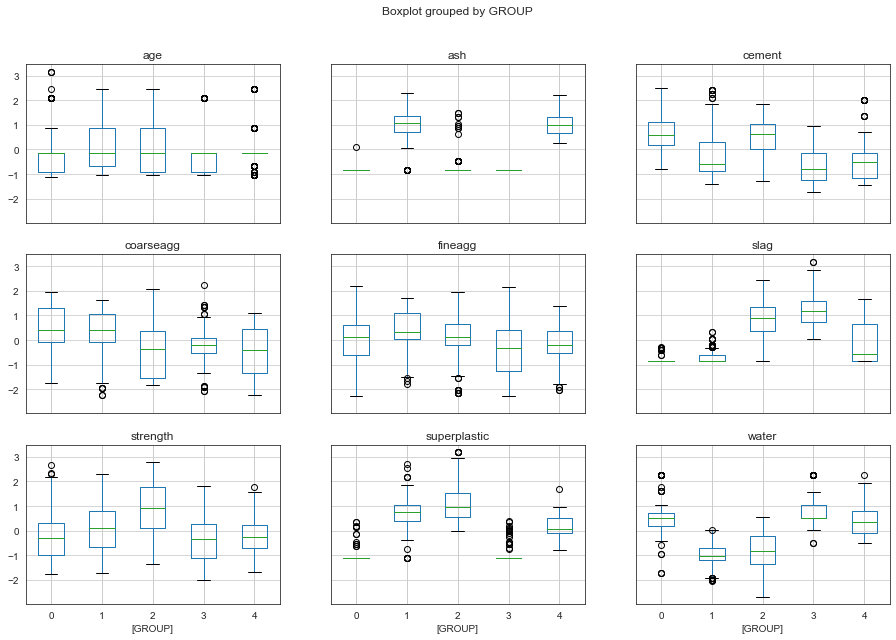

In [42]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.
import matplotlib.pylab as plt
concrete_df_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

### Observation:

1. There are many outliers on each dimension  (indicated by the black circles)
2. Spread of data on each dimension (indivated by the whiskers is long ... due to the outliers)
3. If the outliers are addressed, the clusters will overlap much less than right now
4. None of the dimensions are good predictor of target variable.
5. We can see that the body of the cluster are overlapping.
6. So in k means, though, there are clusters in datasets on different dimensions. But we can not see any distinct characteristics of these clusters which tell us to break data into different clusters and build separate models for them.

## Deliverable -3 (create the model )

    a. Obtain feature importance for the individual features and present your findings

### Let's start with SVR

### Kernel-linear


In [43]:
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]

In [44]:
#Split the data in the ratio of 70:30
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size=0.30, random_state=10)

In [45]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

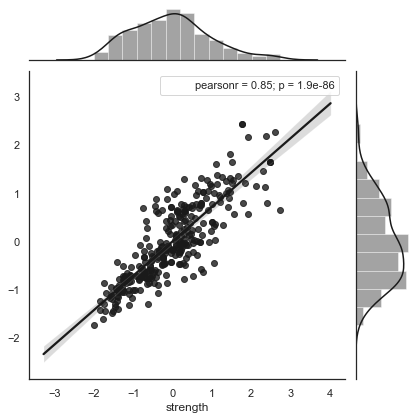

In [46]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k").annotate(stats.pearsonr);


In [47]:
# performance on train data
print('Performance on training data using SVR-linear:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR-linear:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR-linear: ',acc_S)
print('MSE SVR-linear: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR-linear: 0.7104900177533617
Performance on testing data using SVR-linear: 0.7180692944260202
Accuracy SVR-linear:  0.7180692944260202
MSE SVR-linear:  0.2670340154037546


### Observation: Testing Score is Higher that Training Score, so Model is overfitting

In [48]:
#Store the accuracy results for each model in a dataframe for final comparison
results =  pd.DataFrame({'Method':['Support Vector Regressor-linear'], 'accuracy': [acc_S]},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72


## K fold cross validation


In [49]:
num_folds = 10
seed = 10
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X_train,y_train, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6947885968691987
Standard Deviation:  0.08312261669342827


In [50]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVR k fold - linear'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69


### Kernel-rbf

In [51]:
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]

In [52]:
#Split the data in the ratio of 70:30
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size=0.30, random_state=10)

In [53]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [54]:
y_pred = model.predict(X_test)

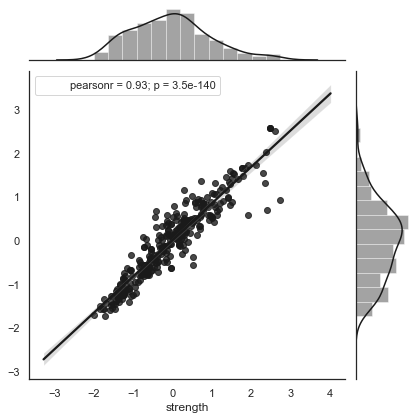

In [55]:
import seaborn as sns
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

            
#g = sns.jointplot("y_actuals", "y_predicted", data=tips, kind="reg",
#                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k").annotate(stats.pearsonr);


In [56]:
# performance on train data
print('Performance on training data using SVR-rbf:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR-rbf:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR-rbf: ',acc_S)
print('MSE SVR-Linear: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR-rbf: 0.9091016339597983
Performance on testing data using SVR-rbf: 0.8717810506641138
Accuracy SVR-rbf:  0.8717810506641138
MSE SVR-Linear:  0.12144410032353804


In [57]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf =  pd.DataFrame({'Method':['Support Vector Regressor- rbf'], 'accuracy': [acc_S]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87


## K fold cross validation


In [58]:
num_folds = 10
seed = 10
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X_train,y_train, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8597931219164587
Standard Deviation:  0.039431891248371716


In [59]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVR k fold- rbf'], 'accuracy': [accuracy]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86


### Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data

## Let's go for PCA and Then Decission Tree

In [60]:
# Now lets split the data to test and train
from sklearn import model_selection

#Splitting the data into independent and dependent attributes
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]

test_size = 0.30 # taking 70:30 training and test set
seed = 10  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

#Scaling of the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#Apply Standard Scaler on the trained Data
X_train_std =  sc.fit_transform(X_train)
cov_matrix = np.cov(X_train_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
#print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

X_train:  (721, 8)
X_test:  (309, 8)
y_train:  (721,)
y_test:  (309,)

 Eigen Values 
%s [2.10997443 0.03984779 0.17343132 1.4239081  1.3290292  0.85695168
 0.99804594 1.07992265]


In [61]:
tot = sum(eig_vals)
var_explained = [(i / tot) for i in sorted(eig_vals, reverse=True)]

cum_var_exp = np.cumsum(var_explained)
print('Cumulative Variance Explained:', cum_var_exp)

Cumulative Variance Explained: [0.263381   0.44112265 0.60702088 0.74182399 0.8664067  0.97337709
 0.99502594 1.        ]


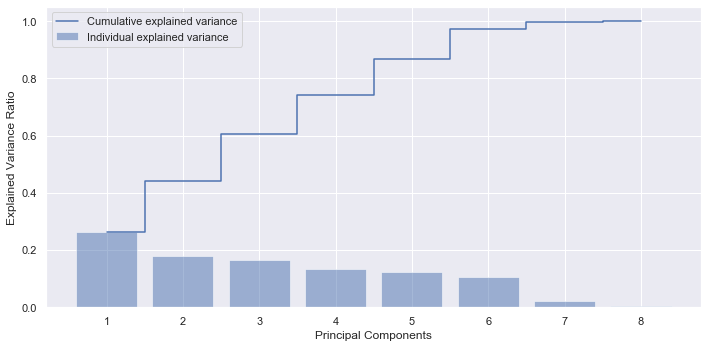

In [62]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_explained, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### on the above explained varience, let's reduce the dimention which will cover approximately 95% of varience, as required in problem solving statement.

In [63]:
from sklearn.decomposition import PCA
# Create a PCA that will retain 95% of the variance
pca = PCA(n_components=.95)
pca.fit(X_train_std)

# Conduct PCA
X_train_pca = pca.transform(X_train_std)

In [64]:
print('Original number of features:', X_train_std.shape[1])
print('Reduced number of features:', X_train_pca.shape[1])

Original number of features: 8
Reduced number of features: 6


In [65]:
# Lets tranform the X_test also, to make the same dimension
X_test_pca = pca.transform(X_test)

In [66]:
print('Original number of features:', X_test.shape[1])
print('Reduced number of features:', X_test_pca.shape[1])

Original number of features: 8
Reduced number of features: 6


In [67]:
pca_concrete_data = pd.DataFrame(X_train_pca)  # converting to dataframe
pca_concrete_data['y'] = y_train

In [68]:
pca_concrete_data.head()

,0,1,2,3,4,5,y
0,-2.11,-0.67,-0.43,-0.33,2.56,-0.55,-0.36
1,-0.63,-0.62,-0.90,-1.19,0.09,0.36,NaN
2,-1.42,-1.22,-1.44,-1.27,0.06,-0.41,-0.40
3,0.19,1.47,0.74,0.22,-0.21,-0.28,0.60
4,1.06,0.36,-0.86,-0.89,0.05,-0.97,-1.05


In [69]:
pca_concrete_data=pca_concrete_data.replace(np.nan,pca_concrete_data.mean())
pca_concrete_data.shape

(721, 7)

## After PCA lets re-check the Accuracy of SVR

### Split the dataset into training and test set in the ratio of 70:30 along with Scaling of the Data(Training:Test).

In [70]:
#Split the data in the ratio of 70:30
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_concrete_data, y_train, test_size=0.30, random_state=10)
print('X_train_pca: ',X_train_pca.shape)
print('X_test_pca: ',X_test_pca.shape)
print('y_train_pca: ',y_train_pca.shape)
print('y_test_pca: ',y_test_pca.shape)

X_train_pca:  (504, 7)
X_test_pca:  (217, 7)
y_train_pca:  (504,)
y_test_pca:  (217,)


## Support Vector Regressor- With PCA


### kernel=linear

In [71]:
model = SVR(kernel='linear')
model.fit(X_train_pca, y_train_pca)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [72]:
y_pred_pca = model.predict(X_test_pca)
# performance on train data
print('Performance on training data using SVR-linear with PCA:',model.score(X_train_pca,y_train_pca))
# performance on test data
print('Performance on testing data using SVR-linear with PCA:',model.score(X_test_pca,y_test_pca))
#Evaluate the model using accuracy
acc_S=metrics.r2_score(y_test_pca, y_pred_pca)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test_pca, y_pred_pca))

Performance on training data using SVR-linear with PCA: 0.6889768498279232
Performance on testing data using SVR-linear with PCA: 0.7085387347703312
Accuracy SVR:  0.7085387347703312
MSE:  0.3002692367096429


In [73]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf =  pd.DataFrame({'Method':['PCA-Support Vector Regressor-linear'], 'accuracy': [acc_S]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71


## K fold cross validation


In [74]:
num_folds = 10
seed = 10
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X_train_pca, y_train_pca, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.672422188235242
Standard Deviation:  0.05554478572921189


In [75]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['PCA-SVR k fold-kernel'], 'accuracy': [accuracy]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67


### Kernel-rbf

In [76]:
model = SVR(kernel='rbf')
model.fit(X_train_pca, y_train_pca)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [77]:
y_pred_pca = model.predict(X_test_pca)
# performance on train data
print('Performance on training data using SVR:',model.score(X_train_pca, y_train_pca))
# performance on test data
print('Performance on testing data using SVR:',model.score(X_test_pca,y_test_pca))
#Evaluate the model using accuracy
acc_S=metrics.r2_score(y_test_pca, y_pred_pca)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test_pca, y_pred_pca))

Performance on training data using SVR: 0.8778711445059882
Performance on testing data using SVR: 0.823698681519708
Accuracy SVR:  0.823698681519708
MSE:  0.1816291516104769


In [78]:
#Store the accuracy results for each model in a dataframe for final comparison
pca_results =  pd.DataFrame({'Method':['PCA-Support Vector Regressor-rbf'], 'accuracy': [acc_S]},index={'7'})
results = pd.concat([results, pca_results])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82


## K fold cross validation


In [79]:
num_folds = 10
seed = 10
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X_train_pca, y_train_pca, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7823290570466563
Standard Deviation:  0.03448699053942863


In [80]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['PCA-SVR k fold-rbf'], 'accuracy': [accuracy]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78


### Observation: Aparently K-fold cross validation is decreasing accuracy, infact it is giving a better approximation for that accuracy, including less overfitting.

## KNN Regressor


In [81]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_pca,y_train_pca)
    pred_i = knn.predict(X_test_pca)
    error.append(np.mean(pred_i!=y_test_pca))

Text(0, 0.5, 'Mean error')

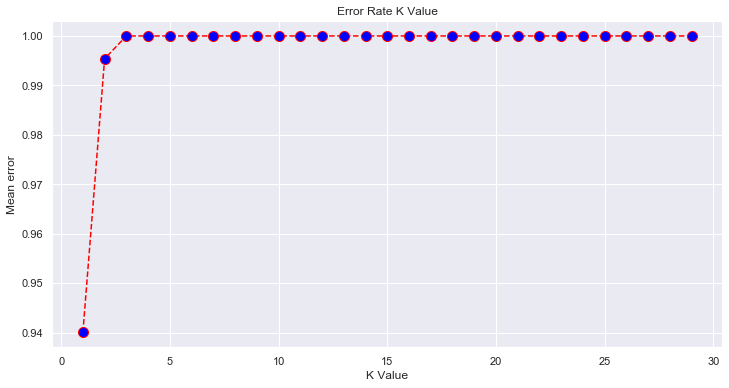

In [82]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [83]:
#k=3
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train_pca, y_train_pca)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [84]:
y_pred = model.predict(X_test_pca)
# performance on train data
print('Performance on training data using KNNR:',model.score(X_train_pca,y_train_pca))
# performance on test data
print('Performance on testing data using KNNR:',model.score(X_test_pca,y_test_pca))
#Evaluate the model using accuracy
acc_K=metrics.r2_score(y_test_pca, y_pred)
print('Accuracy KNNR: ',acc_K)
print('MSE: ',metrics.mean_squared_error(y_test_pca, y_pred))

Performance on training data using KNNR: 0.857355183736114
Performance on testing data using KNNR: 0.6909452792822788
Accuracy KNNR:  0.6909452792822788
MSE:  0.31839436714959973


In [85]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy': [acc_K]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78
9,KNN Regressor,0.69


## K fold cross validation


In [86]:
num_folds = 10
seed = 10
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X_train_pca, y_train_pca, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6743306576829723
Standard Deviation:  0.0720562940856013


In [87]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor k fold'], 'accuracy': [accuracy]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78
9,KNN Regressor,0.69
10,KNN Regressor k fold,0.67


## Regularized Regression

In [88]:
X_train_pca.rename(columns = {"y": "6"}, inplace=True)

In [89]:
X_train_pca.shape

(504, 7)

In [90]:
regression_model = LinearRegression()
regression_model.fit(X_train_pca, y_train_pca)
regression_model.coef_[0]
for idx, col_name in enumerate(X_train_pca.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for 0 is -0.05388717323765249
The coefficient for 1 is 0.19543230660569405
The coefficient for 2 is 0.5043777393964022
The coefficient for 3 is 0.330321030545087
The coefficient for 4 is 0.42563960171475623
The coefficient for 5 is 0.04457001718739867
The coefficient for 6 is 0.02444611842169437


In [91]:
regression_model.intercept_

0.021897761399856518

In [92]:
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.021897761399856518


## Create a regularized RIDGE model and note the coefficients

In [93]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train_pca,y_train_pca)
print ("Ridge model:", (ridge.coef_))

Ridge model: [-0.05387256  0.19535608  0.50415299  0.33014428  0.42537927  0.0445331
  0.02442398]


## Create a regularized LASSO model and note the coefficients

In [94]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_pca,y_train_pca)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [-0.00452941  0.12584296  0.43209413  0.2401545   0.32175072  0.
  0.        ]


In [95]:
print(regression_model.score(X_train_pca, y_train_pca))
accuracy=regression_model.score(X_test_pca, y_test_pca)
print(accuracy)

0.6933448014845381
0.7118253888530421


In [96]:
print(ridge.score(X_train_pca, y_train_pca))
accuracy=ridge.score(X_test_pca, y_test_pca)
print(accuracy)

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['RIDGE model'], 'accuracy': [accuracy]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

0.6933446256716151
0.7118023268706928


,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78
9,KNN Regressor,0.69
10,KNN Regressor k fold,0.67


In [97]:
print(lasso.score(X_train_pca, y_train_pca))
accuracy=lasso.score(X_test_pca, y_test_pca)
print(accuracy)

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['LASSO model'], 'accuracy': [accuracy]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

0.6535111703405201
0.6577247636615573


,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78
9,KNN Regressor,0.69
10,KNN Regressor k fold,0.67


#### More or less similar results but with less complex models in LASSO .  Complexity is a function of variables and coefficients
#### Note - with Lasso, we get equally good result in test though not so in training.  Further, the number of dimensions is much less in LASSO model than ridge or un-regularized model

### Let us generate polynomial models reflecting the non-linear interaction between some dimensions

In [98]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X_poly = poly.fit_transform(X_train_pca)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_train_pca, test_size=0.30, random_state=10)
X_train.shape

(352, 29)

### Fit a simple non regularized linear model on poly features

In [99]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_)

[ 7.08878382e-18 -8.62811476e-02  2.29368908e-01  4.65432940e-01
  3.31285025e-01  4.31300000e-01  2.89052065e-02  1.22852971e-02
  2.36494191e-03  2.96898709e-02  4.18938087e-02 -2.71037145e-02
  5.36444707e-02  1.30099165e-02 -1.82893945e-02  2.39745592e-02
  4.16737906e-02 -2.95170683e-02  9.41314447e-04 -6.03304201e-03
 -5.28743643e-03  1.51343242e-02  1.50222845e-02  7.55421569e-02
  1.26394806e-02  6.89766972e-02 -1.44184184e-02  1.04014067e-02
 -2.57132312e-02]


### Observation: Coeffiecients are very High, lets optimize with Ridge and Lisso

In [100]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.         -0.0862605   0.22906381  0.46474454  0.33105024  0.4307434
  0.02895888  0.01221883  0.00213231  0.02944015  0.04188867 -0.02715847
  0.05378298  0.01303461 -0.01814692  0.02395769  0.04156781 -0.02964334
  0.00089556 -0.00596532 -0.00531696  0.01513147  0.01491052  0.07545502
  0.01236483  0.06899193 -0.01466438  0.01029825 -0.02562513]


In [101]:
print(ridge.score(X_train, y_train))
accuracy=ridge.score(X_test, y_test)
print(accuracy)

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['RIDGE POLLY model'], 'accuracy': [accuracy]},index={'13'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

0.7295012525182669
0.6529019095889013


,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78
9,KNN Regressor,0.69
10,KNN Regressor k fold,0.67


In [102]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.         -0.06985395  0.21860228  0.44888623  0.32341259  0.41578915
  0.01853448  0.         -0.          0.02049969  0.03473938 -0.02230728
  0.05259213  0.01081244 -0.00397083  0.00595666  0.03137587 -0.01536031
 -0.         -0.         -0.          0.00145515  0.          0.06720708
  0.          0.06265631 -0.01184266  0.         -0.00747329]


In [103]:
print(lasso.score(X_train, y_train))
accuracy=lasso.score(X_test, y_test)
print(accuracy)

#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['LASSO POLLY model'], 'accuracy': [accuracy]},index={'14'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

0.7270304101789462
0.6573508581326126


,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78
9,KNN Regressor,0.69
10,KNN Regressor k fold,0.67


## Decission Tree, Random Forest With Bagging And Boosting

# DecisionTree Regression


In [104]:
#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [105]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [106]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9917250270759163
Performance on testing data using DT: 0.8016090112525132
Accuracy DT:  0.8016090112525132
MSE:  0.18790838066860044


**There is a overfitting in the model as the dataset is performing 99% accurately in trainnig data. However, the accuracy on test data drops.**


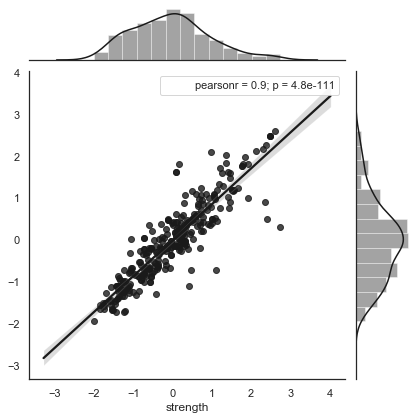

In [107]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [108]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'15'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78
9,KNN Regressor,0.69
10,KNN Regressor k fold,0.67


## K fold cross validation


In [109]:
num_folds = 10
seed = 10
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X_train,y_train, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8319485213693886
Standard Deviation:  0.08035830353495053


In [110]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78
9,KNN Regressor,0.69
10,KNN Regressor k fold,0.67


### Iteration 2


## Drop the insignificant column from the data set and re-run the model

**least significant variable**


In [111]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                Imp
cement        0.35
slag          0.08
ash           0.01
water         0.12
superplastic  0.05
coarseagg     0.02
fineagg       0.06
age           0.31


1. So, cement, age and water are significant attributes.
2. Here, ash, coarseagg, fineagg, superplastic and slag are the less significant variable.These will impact less to the strength column. This we have seen in pairplot also.

In [112]:
concrete_df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null float64
strength        1030 non-null float64
GROUP           1030 non-null int32
dtypes: float64(9), int32(1)
memory usage: 76.6 KB


In [113]:
#Create a copy of the dataset
concrete_df2=concrete_df_z.copy()

In [114]:
#independent and dependent variable
X = concrete_df2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df2['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [115]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [116]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                Imp
cement        0.39
slag          0.08
water         0.14
superplastic  0.05
age           0.31
GROUP         0.04


In [117]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.9905729784892442
Performance on testing data using DT: 0.8335824706673115
Accuracy DT:  0.8335824706673115


**The acuracy on testing dataset is not improved, still it is an overfit model.**


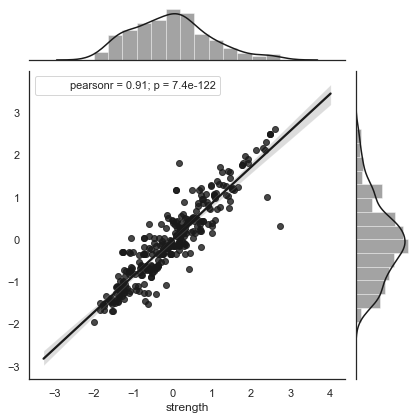

In [118]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [119]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree2- Remove Insignificant Feature'], 'accuracy': [acc_DT]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78
9,KNN Regressor,0.69
10,KNN Regressor k fold,0.67


## Regularising/Pruning of Decision Tree


In [120]:
#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [121]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=10,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

In [122]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


               Imp
cement        0.39
slag          0.04
ash           0.00
water         0.13
superplastic  0.03
coarseagg     0.00
fineagg       0.02
age           0.38


Here, we can see that ash,coarseagg and fineagg are least significant variable.


**Visualizing the Regularized Tree**


In [123]:
concrete_df_z.shape

(1030, 10)

In [124]:
from sklearn.tree import export_graphviz
import graphviz

bank_df=concrete_df_z
xvar = concrete_df_z.drop('strength', axis=1)
feature_cols = xvar.columns

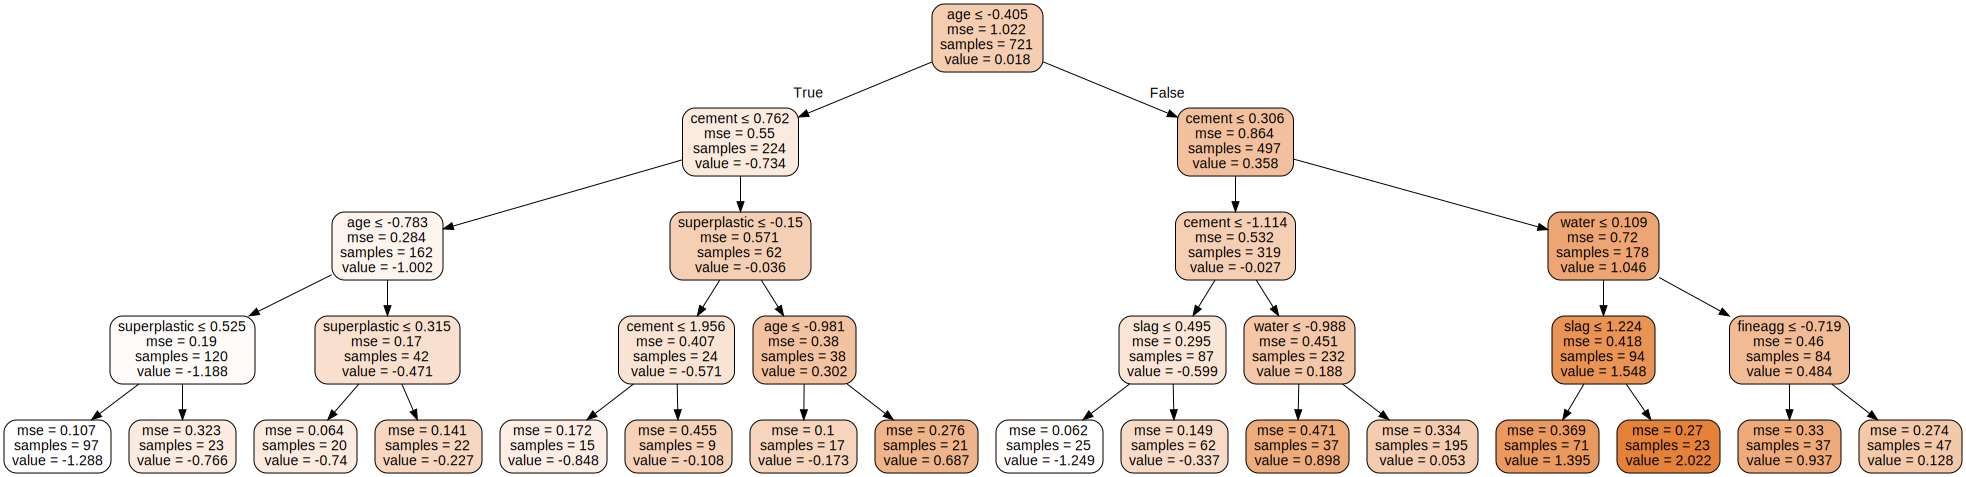

In [125]:
dot_data = export_graphviz(reg_dt_model, out_file=None,feature_names=list(X_train),filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [126]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7459032868363825
Performance on testing data using DT: 0.6558996945161517
Accuracy DT:  0.6558996945161517
MSE:  0.3259186901545181


In [127]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'18'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78
9,KNN Regressor,0.69
10,KNN Regressor k fold,0.67


## K fold cross validation


In [128]:
num_folds = 10
seed = 10
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(reg_dt_model,X_train,y_train, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6615794640116744
Standard Deviation:  0.06258659885174428


In [129]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'19'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78
9,KNN Regressor,0.69
10,KNN Regressor k fold,0.67


## Iteration2


In [130]:
#Create a copy of the dataset
concrete_df3=concrete_df_z.copy()

In [131]:
#independent and dependent variable
X = concrete_df3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df3['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [132]:
X.shape,y.shape

((1030, 6), (1030,))

In [133]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 6), (309, 6), (721,), (309,))

In [134]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=10,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

In [135]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7441534140750544
Performance on testing data using DT: 0.687258066263047
Accuracy DT:  0.687258066263047
MSE:  0.29621723600801403


In [136]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree2'], 'accuracy': [acc_RDT]},index={'20'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78
9,KNN Regressor,0.69
10,KNN Regressor k fold,0.67


## Random Forest

In [137]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [138]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using RFR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9794350003758648
Performance on testing data using RFR: 0.8818115939144696
Accuracy DT:  0.8818115939144696
MSE:  0.11194355218221225


In [139]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'21'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78
9,KNN Regressor,0.69
10,KNN Regressor k fold,0.67


## K fold cross validation


In [140]:
num_folds = 10
seed = 10
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X_train,y_train, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8939456706304363
Standard Deviation:  0.036443941758855916


In [141]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'22'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78
9,KNN Regressor,0.69
10,KNN Regressor k fold,0.67


## Gradient Boosting Regressor


In [142]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [143]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9321421224721846
Performance on testing data using GBR: 0.8819009409953945
Accuracy DT:  0.8819009409953945
MSE:  0.11185892603361516


In [144]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'23'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78
9,KNN Regressor,0.69
10,KNN Regressor k fold,0.67


## K fold cross validation


In [145]:
num_folds = 20
seed = 10
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X_train,y_train, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8806020195384832
Standard Deviation:  0.038937085195550156


In [146]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'24'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78
9,KNN Regressor,0.69
10,KNN Regressor k fold,0.67


## Ada Boosting Regressor


In [147]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [148]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using ABR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ABR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ABR: 0.8252081347578875
Performance on testing data using ABR: 0.7834595488666494
Accuracy DT:  0.7834595488666494
MSE:  0.20509885947242432


In [149]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy': [acc_ABR]},index={'25'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78
9,KNN Regressor,0.69
10,KNN Regressor k fold,0.67


##  K fold cross validation


In [150]:
num_folds = 10
seed = 10
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X_train,y_train, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7906545361214549
Standard Deviation:  0.03692668562428299


In [151]:
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor k fold'], 'accuracy': [accuracy]},index={'26'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78
9,KNN Regressor,0.69
10,KNN Regressor k fold,0.67


## Bagging Regressor


In [152]:
model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [153]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using BR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using BR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using BR: 0.9749419721823406
Performance on testing data using BR: 0.8684169245951565
Accuracy DT:  0.8684169245951565
MSE:  0.1246304722750755


In [154]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'27'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78
9,KNN Regressor,0.69
10,KNN Regressor k fold,0.67


## K fold cross validation


In [155]:
num_folds = 10
seed = 10
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X_train,y_train, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8811974323981315
Standard Deviation:  0.04075802351265405


In [156]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor k fold'], 'accuracy': [accuracy]},index={'28'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Support Vector Regressor-linear,0.72
2,SVR k fold - linear,0.69
3,Support Vector Regressor- rbf,0.87
4,SVR k fold- rbf,0.86
5,PCA-Support Vector Regressor-linear,0.71
6,PCA-SVR k fold-kernel,0.67
7,PCA-Support Vector Regressor-rbf,0.82
8,PCA-SVR k fold-rbf,0.78
9,KNN Regressor,0.69
10,KNN Regressor k fold,0.67


### 1. After applying all the models we can see that Random Forest Regressor k fold, Gradient Boost Regressor, Gradient Boost Regressor k fold, Bagging Regressor k fold are giving better results as compared to other models.

## Deliverable -4 (Tuning the model) (20 marks)

    a. Algorithms that you think will be suitable for this project (5 marks)
    b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit (5 marks)
    c. Model performance range at 95% confidence level (10 marks)


In [157]:
concrete_XY = X.join(y)
concrete_XY.drop(['GROUP'], axis=1, inplace=True)
concrete_XY

,cement,slag,water,superplastic,age,strength
0,-1.34,1.63,1.06,-1.09,-0.15,-0.36
1,-1.07,-0.36,-1.13,0.88,-0.66,-0.74
2,-0.30,-0.86,0.28,-0.09,-0.15,-0.40
3,-0.15,0.48,2.25,-1.09,-0.15,0.60
4,-1.21,1.29,0.57,0.57,-0.15,-1.05
...,...,...,...,...,...,...
1025,-1.40,-0.86,-0.08,0.74,-0.15,-1.35
1026,2.39,-0.86,-1.94,0.08,-1.05,0.33
1027,-0.05,0.50,-0.10,0.53,-0.15,0.51
1028,0.58,-0.41,2.25,-1.09,-0.15,1.15


In [158]:
print('Before GradientBoostingRegressor',X_test.shape, y_test.shape)

Before GradientBoostingRegressor (309, 6) (309,)


In [159]:
# configure bootstrap- GradientBoostingRegressor
from sklearn.utils import resample
values = concrete_XY.values

n_iterations = 100        # Number of bootstrap samples to create
n_size = int(len(concrete_df_z) * 0.7)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):

    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
    # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    gbmTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values

    # evaluate model
    predictions = gbmTree.predict(test[:, :-1])   # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , test[:,-1]) # Take the target column for all rows in test set

    stats.append(score)


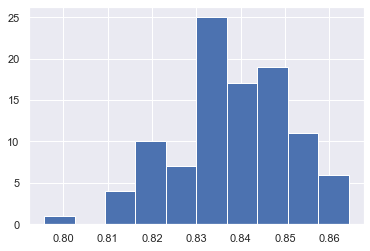

95.0 confidence interval GradientBoostingRegressor 81.3% and 86.2%


In [160]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval GradientBoostingRegressor %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [161]:
# configure bootstrap - RandomForestRegressor
n_iterations = 100              # Number of bootstrap samples to create
n_size = int(len(concrete_df_z) * 0.7)    # size of a bootstrap sample
values = concrete_XY.values
# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration

for i in range(n_iterations):

    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample

    # fit model
    rfTree = RandomForestRegressor(n_estimators=50)  
    rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values

    rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values

    # evaluate model
    predictions = rfTree.predict(test[:, :-1])   # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , test[:,-1]) # Take the target column for all rows in test set

    stats.append(score)


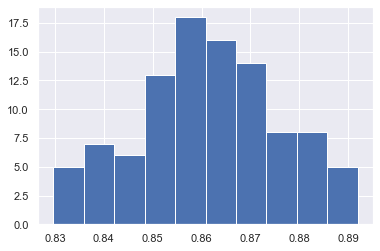

95.0 confidence interval RandomForestRegressor 83.5% and 89.0%


In [162]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval RandomForestRegressor %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

### RandomForestRegressor providing better accuracy compared to GradientBoostingRegressor, so we can consider RandomForestRegressor for doing hyper parameters tuning.

## Model Tuning using hyper parameters - RandomForestRegressor

## RandomizedSearchCV

In [163]:
from pprint import pprint

In [164]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 10)

In [165]:
import numpy as np
print(np.linspace(start = 5, stop = 10, num = 2))

[ 5. 10.]


In [166]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features  = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 15]}


In [167]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.8s finished


In [168]:
rf_random.best_params_

{'n_estimators': 15,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

In [169]:
best_random = rf_random.best_estimator_   # best ensemble model (with optimal combination of hyperparameters)

In [170]:
X_test.shape, y_test.shape

((309, 6), (309,))

In [171]:
best_random.score(X_test , y_test)

0.8857930218524193

## RandomForestRegressor accuracy score improved to 88.58% after doing the Hyper Parameter Tuning.

## GridSearcCV

In [172]:
from sklearn.model_selection import GridSearchCV

In [173]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,6],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5,10],
    'n_estimators': [5,6,7]
}    

In [174]:
rf = RandomForestRegressor(random_state = 1)

In [175]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [176]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train);

In [177]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 7}

In [178]:
best_grid = grid_search.best_estimator_
best_grid.score(X_test, y_test)

0.8220870890647571

### The accuracy is relatively lower 82.21% as we have severly restricted the hyper parameter ranges. This was done to minimize, execution time. The Girdsearch has lower probability of finding the best combination than the randomsearch

### **** END of Project ***